## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [2]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Identify and handle missing values

In [3]:
df.replace('?', np.nan, inplace=True)

In [4]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

- normalized-losses: 41 missing values
- num-of-doors: 2 missing values
- bore: 4 missing values
- stroke: 4 missing values
- horsepower: 2 missing values
- peak-rpm: 2 missing values
- price: 4 missing values

## Deal with missing data

### 1. replace by mean

In [5]:
avg_normalized_losses =df['normalized-losses'].astype('float').mean(axis = 0)
avg_bore =df['bore'].astype('float').mean(axis = 0)
avg_stroke =df['stroke'].astype('float').mean(axis = 0)
avg_horsepower =df['horsepower'].astype('float').mean(axis = 0)
avg_peak_rpm =df['peak-rpm'].astype('float').mean(axis = 0)

df['normalized-losses'].replace(np.nan, avg_normalized_losses, inplace=True)
df['bore'].replace(np.nan, avg_bore, inplace=True)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2. replace by frequency

In [6]:
print(df['num-of-doors'].value_counts())
print('')
print(df['num-of-doors'].value_counts().idxmax()) #'four is the most common value'

four    114
two      89
Name: num-of-doors, dtype: int64

four


In [7]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

df['num-of-doors'].isnull().sum()

0

### 3. Drop the whole row:

In [8]:
df.dropna(subset=['price'], axis = 0, inplace=True)

# reset index, because i droped two rows
df.reset_index(drop=True, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Correct data format

In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## data transformation 

In [11]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [12]:
#Transform mpg to L/100km by mathematical operation (235 divided by mpg)

df["city-mpg"] = 235/df["city-mpg"]
# rename column name from "city-mpg" to "city-L/100km"
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)


df["highway-mpg"] = 235/df["highway-mpg"]
# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


## Data Normalization

In [13]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price'],
      dtype='object')

In [14]:
#scaling the columns "length", "width" and "height

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


## Binning

* the process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

Text(0.5, 1.0, 'horsepower bins')

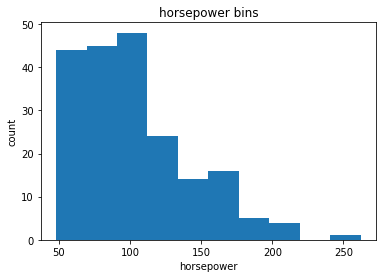

In [15]:
df["horsepower"] = df["horsepower"].astype('int')

plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

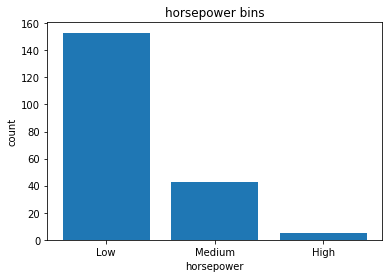

In [16]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

plt.pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Turning categorical variables into quantitative Variables (one-hot-encoding)

In [17]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price', 'horsepower-binned'],
      dtype='object')

In [18]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [19]:
#create an indicator variable for the column "aspiration"
dummy_variable_2 = pd.get_dummies(df["aspiration"])
#rename
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


In [20]:
#save the new csv
df.to_csv('clean_df.csv')